In [208]:
from src import unpickle 
from src import train_category
from importlib import reload
from sklearn import tree as t
import numpy as np
import src.game as g


long_key, questions, grading_Key,\
keys2trait, Trait_dict_keys, Trait_dict_questions,\
graded_df, percentile_df, traits_df= unpickle.Load_pickled_files()

In [209]:
#set up the target and the 
def Train_models(max_depth = 3):
    Traits = ['Openness','Conscientiousness','Extraversion','Agreeableness','Neuroticism']
    models = []

    for trait in Traits:
        y = traits_df[trait].values*100
        y = [int(x) for x in y]
        X = questions.values

        # train the model

        model,X_test,y_test = train_category.train_category(X,y,traits_df,max_depth)

        #export the tree
        t.export_graphviz(model,out_file='tree.dot') 
        print(trait)
        error = np.round(np.mean(np.abs(model.predict(X_test)-y_test)),2)
        print('Mean abs error: '+str(error)+'%','\n','-'*50)
        models.append(model)
    return Traits,models
        

In [210]:
print("How many questions would you like (max) per trait")
max_depth = -1
while (max_depth < 0) or (max_depth > 15):
    max_depth = input('Enter a integer between 2 and 15: ')
    max_depth = int(max_depth)


print('\n','-'*50,'\n')

print('Would you like to play the game for all traits or only one?')


Number = -1
while (Number != 'a') and (Number != '1'):
    Number = input('Enter either "a" for all or "1" for one ')


Traits,models = Train_models(max_depth - 1)

How many questions would you like (max) per trait
Enter a integer between 2 and 15: 2

 -------------------------------------------------- 

Would you like to play the game for all traits or only one?
Enter either "a" for all or "1" for one a
Openness
Mean abs error: 20.34% 
 --------------------------------------------------
Conscientiousness
Mean abs error: 19.43% 
 --------------------------------------------------
Extraversion
Mean abs error: 19.04% 
 --------------------------------------------------
Agreeableness
Mean abs error: 20.48% 
 --------------------------------------------------
Neuroticism
Mean abs error: 18.73% 
 --------------------------------------------------


In [211]:
Number = 'a'
if Number == '1':
    tree = models[0].tree_
    print(Traits[0])
    quiz = g.Quiz()
    quiz.play_game(tree,long_key,questions)

else:
    for i,model in enumerate(models):
        tree = model.tree_
        print(Traits[i])
        quiz = g.Quiz()
        if i == 0:
            df = quiz.play_game(tree,long_key,questions)
        else:
            df = quiz.play_game(tree,long_key,questions,(True,df))
        print(Traits[i])
        print('\n\n')

# quiz_openness = g.Quiz()
# df = quiz_openness.play_game(tree,long_key,questions)

Openness
Hello, welcome to the quiz game!  Answer the following questions
        to better understand where you fall in the personality thing 

For each statement, rank the statement based on 1-5 scale
        

 1 = Very Innacurate and 5 = Very accurate


-------------------------------------------------- 


Do not like art. 2
Fall in the 32.16% percentile of this trait which correponds to node: 1
Openness



Conscientiousness
Hello, welcome to the quiz game!  Answer the following questions
        to better understand where you fall in the personality thing 

For each statement, rank the statement based on 1-5 scale
        

 1 = Very Innacurate and 5 = Very accurate


-------------------------------------------------- 


Have difficulty starting tasks. 2
Fall in the 67.134% percentile of this trait which correponds to node: 2
Conscientiousness



Extraversion
Hello, welcome to the quiz game!  Answer the following questions
        to better understand where you fall in the persona

In [33]:
import pandas
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
uservals = quiz.df.loc[0,:]

everyone = questions[quiz.df.columns[uservals.nonzero()]]
everyone_abs = np.abs(everyone - uservals[quiz.df.columns[uservals.nonzero()]])
ind = everyone_abs.sum(axis = 1).sort_values()[:10].index

percentile_df_user = percentile_df.loc[ind,:].mean(axis = 0)
    
    

No handles with labels found to put in legend.


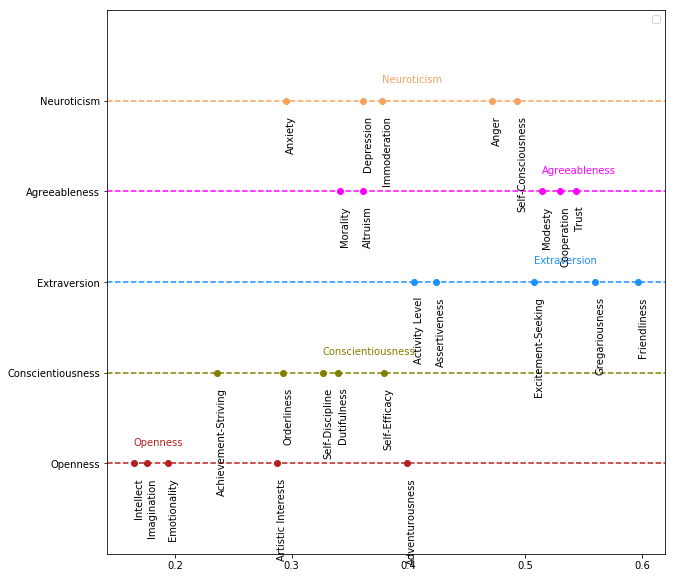

In [12]:
user = questions.sample(1)
user_id = user.index
colors = ['firebrick','olive','dodgerblue','magenta','sandybrown']

_, ax = plt.subplots(1,1,figsize=(10,10))
import pandas as pd
height = 0
count = 0
Y_ticks = []
for Trait,facets in Trait_dict_keys.items():
    color = colors[count]
    height += 2
    count +=1
    
    
    
    
    for facet in facets:
        #names.append(Trait+'-'+facet)
        name = Trait+'-'+facet
        x = percentile_df_user[name]
        plt.scatter(x,height,color = color)
        xy = (x,height -1/2)
        facet_name = keys2trait[facet][1]
        ax.annotate(facet_name, xy=xy, xytext=xy,rotation = 90)
    ax.axhline(height,0,1,ls = '--',c = color)
    
    #x = traits_df.loc[user_id,Trait]
    facet_name = keys2trait[facet][0]
   # plt.scatter(x,height,color = color,s = 200,label = facet_name )
    xy = (x,height +.4)
    ax.annotate(facet_name, xy=xy, xytext=xy,rotation = 0,color = color)
    Y_ticks.append(Trait)
        
ax.set_ylim([0,12])
ax.set_yticks(range(2,12,2))
ax.set_yticklabels(Y_ticks);
plt.legend()

In [250]:
import matplotlib.pyplot as plt
import numpy.random as rnd
from matplotlib.patches import Ellipse
import numpy as np
from numpy.random import rand
import random

[0.37652935 0.36516851 0.2823836  0.64012996 0.90747999]


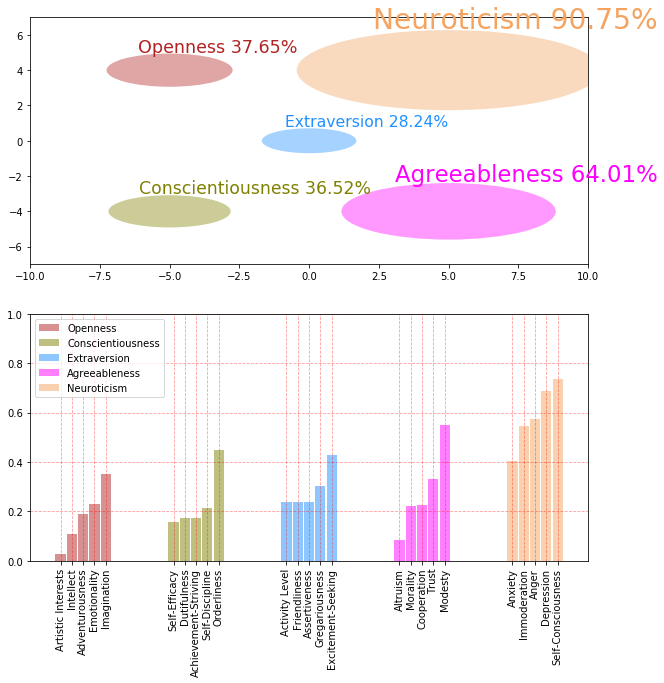

In [35]:
trait_scores = rand(5,1)[:,0]#np.array([.93,.4,.1,.2,.5])

locs = [(-5,4),(-5,-4),(0,0),(5,-4),(5,4)]

w_scaling = 12
h_scaling = 5


#Define the traits and the colors
Traits = np.array(['Openness','Conscientiousness','Extraversion','Agreeableness','Neuroticism'])
colors = ['firebrick','olive','dodgerblue','magenta','sandybrown']
angles = [0,45,180,240,300]
    
#create the Eclipses
est = [Ellipse(xy=loc, width=trait*w_scaling, height=trait*h_scaling)
    for loc,trait in zip(locs,trait_scores)]

#Create the figure
_,ax = plt.subplots(2,1,figsize = (10,10))

#Add each of the eclispses to the figure
for color,e in zip(colors,est):
    ax[0].add_artist(e)
    e.set_clip_box(ax[0].bbox)
    e.set_alpha(.4)
    e.set_facecolor(color)
    
#Set the X and Y axis up
ax[0].set_xlim(-10, 10)
ax[0].set_ylim(-7, 7)

#Go through and add the trait to the graph
for score, trait,loc,color in zip(trait_scores,Traits,locs,colors):
    
    #Change the Location a little
    loc2 = (loc[0]-score*w_scaling/4,loc[1]+score*h_scaling/2+.1)
    
    #Add the text
    ax[0].annotate(trait+' '+str(np.round(score*100,2))+'%',
                xy=loc2,color = color,size=20*(score+1/2))
    count = 1
#     for bla in percentile_df_user.index:
#         if (trait[0] in bla):
            
#             val = percentile_df_user.loc[bla]
#             #print(np.round(val*100,2))
#             Coord = (loc2[0]+1,loc2[1]-count/2)
#             ax.annotate(bla,xy=Coord,color = color,size = 20*val)
#             count+=1

print(trait_scores)

final_x_ticks = []
final_x_labels = []
colors = ['firebrick','olive','dodgerblue','magenta','sandybrown']
count = 0
for trait in Traits:
    values = []
    names = []
    for bla in percentile_df_user.index:
        if (trait[0] in bla):
            values.append(percentile_df_user.loc[bla])
            names.append(keys2trait[bla.split('-')[1]][1])


    ind = np.argsort(values)
    values = np.array(values)[ind]
    names = np.array(names)[ind]
    bottom = 5*count
    top = bottom+5
    pos = list(range(bottom,top)) 
    width = .9
    ax[1].bar(pos, 
            #using 'openness data,
            values, 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5,
           color = colors[int(count/2)],
             label = trait) 
    count +=2
    final_x_ticks.append(pos)
    final_x_labels.append(names)

ax[1].set_xticks(np.ndarray.flatten(np.array(final_x_ticks)));
ax[1].set_xticklabels(np.ndarray.flatten(np.array(final_x_labels)),rotation = 90);
ax[1].set_ylim([0,1])
ax[1].grid(alpha = .4,ls = '--',color = 'r')
ax[1].legend()

In [27]:
            
    plt.show()
print(trait_scores)

final_x_ticks = []
final_x_labels = []
colors = ['firebrick','olive','dodgerblue','magenta','sandybrown']
count = 0
for trait in Traits:
    values = []
    names = []
    for bla in percentile_df_user.index:
        if (trait[0] in bla):
            values.append(percentile_df_user.loc[bla])
            names.append(keys2trait[bla.split('-')[1]][1])


    ind = np.argsort(values)
    values = np.array(values)[ind]
    names = np.array(names)[ind]
    bottom = 5*count
    top = bottom+5
    pos = list(range(bottom,top)) 
    width = .9
    ax[1].bar(pos, 
            #using 'openness data,
            values, 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5,
           color = colors[int(count/2)],
             label = trait) 
    count +=2
    final_x_ticks.append(pos)
    final_x_labels.append(names)

ax[1].set_xticks(np.ndarray.flatten(np.array(final_x_ticks)));
ax[1].set_xticklabels(np.ndarray.flatten(np.array(final_x_labels)),rotation = 90);
ax[1].set_ylim([0,1])
ax[1].grid(alpha = .4,ls = '--',color = 'r')
ax[1].legend()

IndentationError: unexpected indent (<ipython-input-27-358d60030311>, line 2)

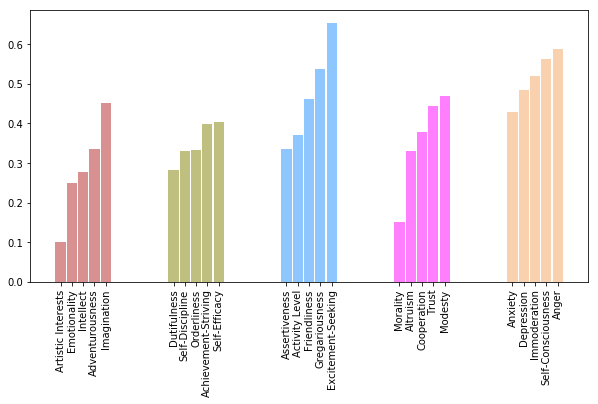

In [384]:
final_x_ticks = []
final_x_labels = []
colors = ['firebrick','olive','dodgerblue','magenta','sandybrown']
count = 0
fig, ax = plt.subplots(figsize=(10,5))
for trait in Traits:
    values = []
    names = []
    for bla in percentile_df_user.index:
        if (trait[0] in bla):
            values.append(percentile_df_user.loc[bla])
            names.append(keys2trait[bla.split('-')[1]][1])
            
    
    ind = np.argsort(values)
    values = np.array(values)[ind]
    names = np.array(names)[ind]
    bottom = 5*count
    top = bottom+5
    pos = list(range(bottom,top)) 
    width = .9
    plt.bar(pos, 
            #using 'openness data,
            values, 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5,
           color = colors[int(count/2)]) 
    count +=2
    final_x_ticks.append(pos)
    final_x_labels.append(names)

ax.set_xticks(np.ndarray.flatten(np.array(final_x_ticks)));
ax.set_xticklabels(np.ndarray.flatten(np.array(final_x_labels)),rotation = 90);

## 

In [134]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.model_selection import train_test_split

def train_category(X,y,traits_df,max_depth):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    model = DT(max_depth = max_depth)
    model.fit(X_train,y_train)


    return model,X_test,y_test


def train_category(X,y,traits_df,max_depth):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    model = RFC(max_depth=4, random_state=0,max_features = 1,oob_score=True)
    model.fit(X_train,y_train)


    return model,X_test,y_test

def Train_models(max_depth = 3):
    Traits = ['Openness','Conscientiousness','Extraversion','Agreeableness','Neuroticism']
    models = []

    for trait in Traits:
        y = traits_df[trait].values*100
        y = [int(x) for x in y]
        X = questions.values

        # train the model

        model,X_test,y_test = train_category(X,y,traits_df,max_depth)

        #export the tree
        t.export_graphviz(model,out_file='tree.dot') 
        print(trait)
        error = np.round(np.mean(np.abs(model.predict(X_test)-y_test)),2)
        print('Mean abs error: '+str(error)+'%','\n','-'*50)
        return model
        break
        models.append(model)
    return Traits,models

model = Train_models()


/Users/elliottsaslow/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/elliottsaslow/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/elliottsaslow/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [133]:
model.feature_importances_

array([0.        , 0.00244508, 0.        , 0.00101352, 0.00119295,
       0.        , 0.00456962, 0.07038703, 0.00240076, 0.00069372,
       0.00141135, 0.        , 0.        , 0.        , 0.0065605 ,
       0.        , 0.        , 0.        , 0.        , 0.00382379,
       0.        , 0.01570403, 0.01360434, 0.        , 0.        ,
       0.        , 0.00347619, 0.        , 0.        , 0.        ,
       0.        , 0.02527085, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02398064, 0.        , 0.        ,
       0.00130201, 0.00784373, 0.        , 0.00444846, 0.        ,
       0.00154492, 0.        , 0.        , 0.        , 0.00525238,
       0.        , 0.00433662, 0.01288126, 0.        , 0.00347427,
       0.00156308, 0.02975023, 0.        , 0.        , 0.        ,
       0.00040098, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01939881, 0.00597755, 0.00748171,
       0.00083693, 0.        , 0.00591916, 0.00237978, 0.     